In [30]:
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [46]:
df = pd.read_csv(f"tmdb_movie_precovid.csv")
plt.rcParams.update({"font.size":9})

In [47]:
df.head()

,Unnamed: 0.1,Unnamed: 0,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,...,title,video,vote_average,vote_count,Budget,Revenue,Country,Genres,imdb_id,year
0,0,1.0,False,/7OxGhxUYAdtuike29VMzEFxJx7y.jpg,"[35, 14]",2907.0,en,The Addams Family,When a man claiming to be long-lost Uncle Fest...,298.037,...,The Addams Family,False,7.0,3809.0,30000000.0,191502426.0,United States of America,Comedy,tt0101272,2017.0
1,1,2.0,False,/qkt1Qn9j6yw9rcJhvSu1p3wuiBm.jpg,"[10751, 35, 14]",8871.0,en,How the Grinch Stole Christmas,Inside a snowflake exists the magical land of ...,230.236,...,How the Grinch Stole Christmas,False,6.7,6198.0,123000000.0,345823040.0,Germany,Family,tt0170016,2017.0
2,2,3.0,False,/naNXYdBzTEb1KwOdi1RbBkM9Zv1.jpg,"[27, 53]",420634.0,en,Terrifier,"On Halloween night, a young woman finds hersel...",192.431,...,Terrifier,False,6.6,1122.0,100000.0,0.0,United States of America,Horror,tt4281724,2017.0
3,3,4.0,False,/1stUIsjawROZxjiCMtqqXqgfZWC.jpg,"[12, 14]",672.0,en,Harry Potter and the Chamber of Secrets,"Cars fly, trees fight back, and a mysterious h...",182.003,...,Harry Potter and the Chamber of Secrets,False,7.7,18991.0,100000000.0,876688482.0,United Kingdom,Adventure,tt0295297,2017.0
4,4,5.0,False,/urDWNffjwmNi5IQaezw9GwqkUXa.jpg,"[12, 14]",767.0,en,Harry Potter and the Half-Blood Prince,As Lord Voldemort tightens his grip on both th...,176.511,...,Harry Potter and the Half-Blood Prince,False,7.7,16838.0,250000000.0,933959197.0,United Kingdom,Adventure,tt0417741,2017.0


In [48]:
data = df[["popularity","vote_average","vote_count", "Revenue","Country","Genres", "Budget" ]].copy()

In [49]:
data.head()
data.dropna()

,popularity,vote_average,vote_count,Revenue,Country,Genres,Budget
0,298.037,7.0,3809.0,191502426.0,United States of America,Comedy,30000000.0
1,230.236,6.7,6198.0,345823040.0,Germany,Family,123000000.0
2,192.431,6.6,1122.0,0.0,United States of America,Horror,100000.0
3,182.003,7.7,18991.0,876688482.0,United Kingdom,Adventure,100000000.0
4,176.511,7.7,16838.0,933959197.0,United Kingdom,Adventure,250000000.0
...,...,...,...,...,...,...,...
5880,1.228,8.1,6.0,0.0,India,Documentary,67000.0
5881,1.226,6.0,2.0,0.0,United States of America,Horror,10000.0
5882,1.226,6.0,2.0,0.0,United States of America,Horror,10000.0
5883,1.226,0.5,1.0,0.0,Spain,Horror,6700.0


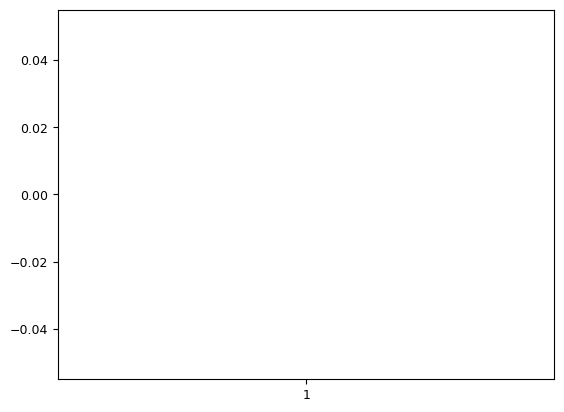

,popularity,vote_average,vote_count,Revenue,Country,Genres,Budget
87,27.329,7.2,4288.0,311950384.0,Denmark,Animation,80000000.0
88,27.275,8.2,7092.0,305937718.0,United States of America,Drama,20000000.0
89,26.540,7.1,2228.0,14793385.0,China,Romance,30000000.0
95,25.239,7.8,226.0,52946454.0,South Korea,Action,5883687.0
97,25.032,5.5,4000.0,40651864.0,United States of America,Drama,18000000.0


In [50]:
pop = data["popularity"]
quartiles = pop.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
fig1, ax1 = plt.subplots()
ax1.boxplot(pop)
plt.show()
outliers = data.loc[(data["popularity"]<=lower_bound) | (data["popularity"]>=upper_bound)]
filtered = data.loc[(data["popularity"]>=lower_bound) & (data["popularity"]<=upper_bound) & (data["Budget"]!=0)\
                                                                                 & (data["Revenue"]!=0),:]
outliers.count()
filtered.head()

In [51]:
sorted_data = filtered.sort_values("popularity", ascending=False)
sorted_data.head()

,popularity,vote_average,vote_count,Revenue,Country,Genres,Budget
1427,27.492,5.4,246.0,4537.0,United States of America,Action,13000000.0
3296,27.492,5.4,246.0,4537.0,United States of America,Action,13000000.0
87,27.329,7.2,4288.0,311950384.0,Denmark,Animation,80000000.0
1184,27.329,7.2,4288.0,311950384.0,Denmark,Animation,80000000.0
3297,27.329,7.2,4288.0,311950384.0,Denmark,Animation,80000000.0


In [52]:
country = sorted_data.groupby(by = ["Country"], as_index = False).sum()
country = country.sort_values("popularity", ascending=False)
country = country.head(15)


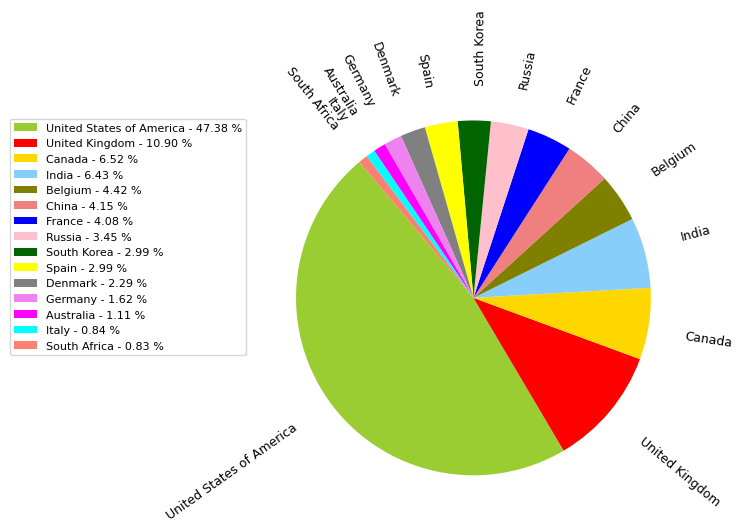

In [53]:
x = country["Country"]
y = country["popularity"]
colors = ['yellowgreen','red','gold','lightskyblue','olive','lightcoral','blue','pink',\
          'darkgreen','yellow','grey','violet','magenta','cyan', 'salmon', 'powderblue', 'blueviolet', 'fuchsia',\
         'darkred', 'lime', 'cornflowerblue']
percent = (100.0*y)/(y.sum())

patches, texts = plt.pie(y, colors=colors, startangle=130, radius=1.2, labels = x, rotatelabels = 90, labeldistance= 1.2,\
                         textprops={'fontsize': 9})
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1),
           fontsize=8)

plt.savefig(f"country_precovid.png", bbox_inches='tight')
plt.show()
plt.rcParams.update({"font.size":9})

In [54]:
genre = sorted_data.groupby(["Genres"]).count()
genre = genre.sort_values(by = ["popularity"], ascending= False)
genre.head()

,popularity,vote_average,vote_count,Revenue,Country,Budget
Genres,,,,,,
Drama,329,329,329,329,329,329
Comedy,258,258,258,258,258,258
Action,184,184,184,184,184,184
Crime,70,70,70,70,70,70
Thriller,68,68,68,68,68,68


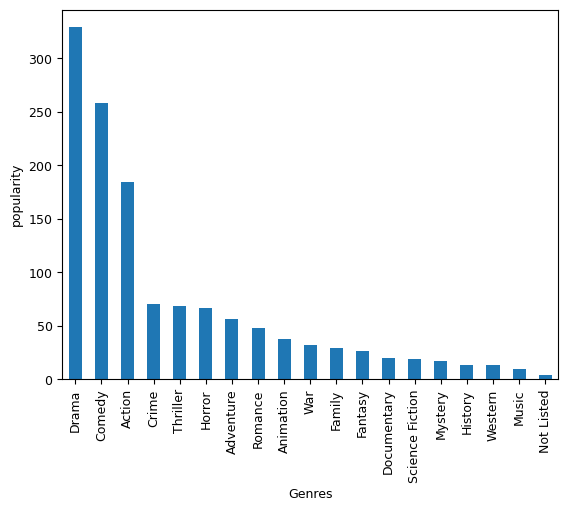

In [55]:
genre.apply(["popularity"], axis=1).plot(kind="bar", legend=False)
plt.ylabel('popularity')
textprops={'fontsize': 12}
plt.savefig(f"genre_precovid.png", bbox_inches='tight')

In [56]:
budget = filtered.sort_values("Budget")
budget.head(20)

,popularity,vote_average,vote_count,Revenue,Country,Genres,Budget
2595,0.600,10.0,1.0,1.0,United States of America,Drama,1.0
1100,0.600,10.0,1.0,1.0,United States of America,Drama,1.0
4835,2.623,6.3,8.0,24.0,United States of America,Action,1.0
4836,2.623,6.3,8.0,24.0,United States of America,Action,1.0
2594,2.623,6.3,8.0,24.0,United States of America,Action,1.0
2589,0.600,0.0,0.0,4.0,Not Listed,Action,2.0
2587,0.600,10.0,1.0,300.0,United States of America,Thriller,5.0
1099,0.600,10.0,1.0,300.0,United States of America,Thriller,5.0
880,1.176,5.0,1.0,15.0,India,Comedy,9.0
2586,1.176,5.0,1.0,15.0,India,Comedy,9.0


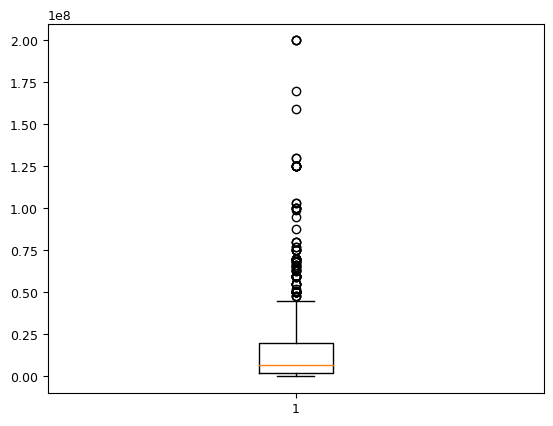

popularity      92
vote_average    92
vote_count      92
Revenue         92
Country         92
Genres          92
Budget          92
dtype: int64

In [57]:
bud = budget["Budget"]
quartiles = bud.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
fig1, ax1 = plt.subplots()
ax1.boxplot(bud)
plt.show()
outliers = budget.loc[(budget["Budget"]<=lower_bound) | (budget["Budget"]>=upper_bound)]
budget = budget.loc[(budget["Budget"]>=lower_bound) & (budget["Budget"]<=upper_bound),:]
outliers.count()

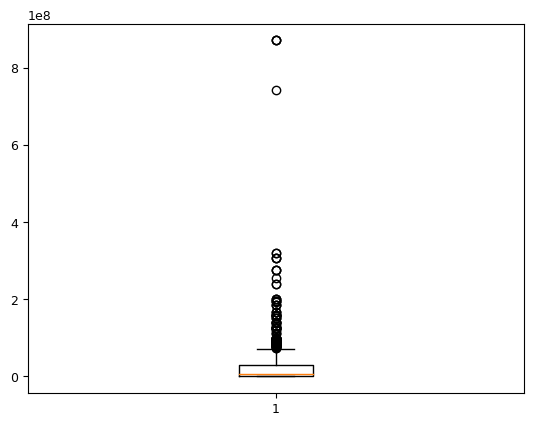

popularity      109
vote_average    109
vote_count      109
Revenue         109
Country         109
Genres          109
Budget          109
dtype: int64

In [58]:
bud = budget["Revenue"]
quartiles = bud.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
fig1, ax1 = plt.subplots()
ax1.boxplot(bud)
plt.show()
outliers = budget.loc[(budget["Revenue"]<=lower_bound) | (budget["Revenue"]>=upper_bound)]
budget = budget.loc[(budget["Revenue"]>=lower_bound) & (budget["Revenue"]<=upper_bound),:]
outliers.count()

The correlation between both factors is 0.53
The r-squared is: 0.28174111564286397


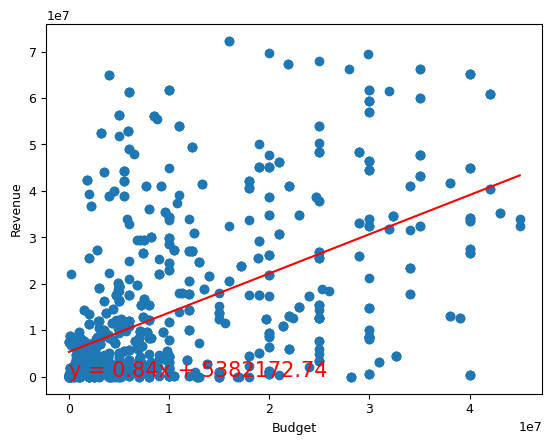

In [59]:
# Add the linear regression equation and line to plot
x_values = budget["Budget"]
y_values = budget["Revenue"]
correlation = st.pearsonr(budget["Budget"],budget["Revenue"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Budget')
plt.ylabel('Revenue')
correlation = st.pearsonr(budget["Budget"],budget["Revenue"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig(f"BudgetVsRevenue_precovid.png", bbox_inches = 'tight')
plt.show()

The correlation between both factors is 0.52
The r-squared is: 0.2668004891145089


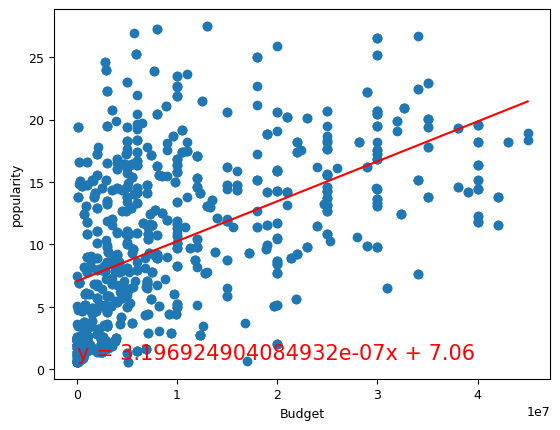

In [60]:
x_values = budget["Budget"]
y_values = budget["popularity"]
correlation = st.pearsonr(budget["Budget"],budget["popularity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Budget')
plt.ylabel('popularity')
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig(f"BudgetVsPopularity_precovid.png", bbox_inches = 'tight')
plt.show()